Document Clustering Project

Supriti Ghosh (SID: 101077457)

#### Importing libraries

In [1]:
import pandas as pd
import wikipedia

In [2]:
articles =['Data Science','Artificial intelligence','Financial technology','International Monetary Fund','Basketball','Swimming']
wiki_list=[]
title=[]

for article in articles:
    print("loading content: ",article)
    wiki_list.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_list

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
examine content


['Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of 

#### Representing each article as a vector

##### Since we are going to use k-means, we need to represent each article as a numeric vector. A popular method is to use term-frequency/inverse-document-frequency (tf-idf).

#### Importing libraries for tf-idf

In [3]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
vectorizer= TfidfVectorizer(stop_words={'english'})
X =vectorizer.fit_transform(wiki_list)

In [5]:
print(vectorizer.get_feature_names())
print(X.shape)

['000', '0001', '001', '0026', '003', '0030', '0036', '0040', '007', '0094', '01', '011', '011082', '012', '013', '019', '0190', '01900692', '0198', '02', '03384', '04521', '0464', '0465065707', '048', '05', '05830', '06', '0692', '07', '0706', '08', '08153', '08813', '0893', '09', '09540090310001655110', '10', '100', '1002', '100450', '1007', '100k', '101', '1013298507114', '1016', '10168773', '1017', '1023', '1039480085', '1080', '1083694322', '108771', '1093', '10m', '11', '110', '1109', '1110727808', '11229402', '1124', '1126', '113', '1131', '114', '1145', '115', '11573548', '1162', '117', '11715509', '1197', '11v', '12', '120', '1202', '122', '1228', '125', '1259433', '126', '13', '1309', '1332', '133646', '14', '1404', '143', '143452957', '145', '1452734', '145b', '149', '1498103', '14987656', '14th', '15', '150', '1500', '151', '1513681', '153', '1538', '1561', '1563803', '158829602', '16', '160', '1606', '1609', '1610', '1625', '164', '165449', '16622160', '166742927', '168', 

In [6]:
print(X[0,])

  (0, 5107)	0.006121200523808166
  (0, 4707)	0.008180814554860841
  (0, 5265)	0.009546720978049796
  (0, 569)	0.011307680630631856
  (0, 850)	0.013789613862769487
  (0, 765)	0.011307680630631856
  (0, 3862)	0.008180814554860841
  (0, 6141)	0.006121200523808166
  (0, 6127)	0.013789613862769487
  (0, 1483)	0.011307680630631856
  (0, 1062)	0.022615361261263713
  (0, 4172)	0.011307680630631856
  (0, 3317)	0.013789613862769487
  (0, 6058)	0.009546720978049796
  (0, 4589)	0.008180814554860841
  (0, 4969)	0.008180814554860841
  (0, 4592)	0.011307680630631856
  (0, 5693)	0.007064787745912165
  (0, 1628)	0.011307680630631856
  (0, 1619)	0.011307680630631856
  (0, 5097)	0.007064787745912165
  (0, 5101)	0.009546720978049796
  (0, 2064)	0.011307680630631856
  (0, 6200)	0.008180814554860841
  (0, 2952)	0.007064787745912165
  :	:
  (0, 583)	0.008180814554860841
  (0, 587)	0.022615361261263713
  (0, 829)	0.008180814554860841
  (0, 6417)	0.013789613862769487
  (0, 5899)	0.011307680630631856
  (0, 4283

#### Performing K-Means clustering
Each row of variable X is a vector representation of a Wikipedia article. Hence, we can use X as input for the k-means algorithm.
First, we must decide on the number of clusters. Here, we will use the elbow method.

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

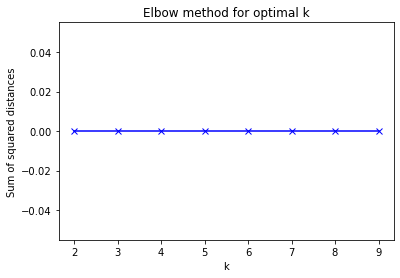

In [8]:
Sum_of_squared_distances=[]
K= range(2,10)
for k in K:
    km=KMeans(n_clusters=6,max_iter=200,n_init=10,random_state=0)
    km =km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

In [9]:
true_k =6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)

model.fit(X)
labels=model.labels_
wiki_cluster=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cluster.sort_values(by=['cluster']))

                         title  cluster
3  International Monetary Fund        0
2         Financial technology        1
0                 Data Science        2
1      Artificial intelligence        3
5                     Swimming        4
4                   Basketball        5


#### Evaluation of the result

##### Since we have used only 6 articles, it is fairly easy to evaluate the clustering just by examining what articles are contained in each cluster. That would be difficult for a large corpus. A nice way is to create a word cloud from the articles of each cluster.

In [10]:
from wordcloud import WordCloud

cluster: 0
Titles
International Monetary Fund


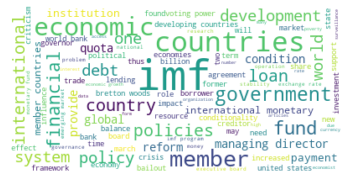

cluster: 1
Titles
Financial technology


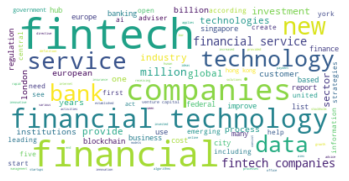

cluster: 2
Titles
Data Science


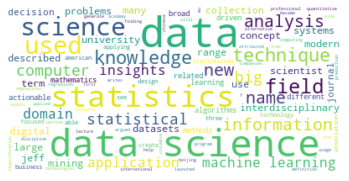

cluster: 3
Titles
Artificial intelligence


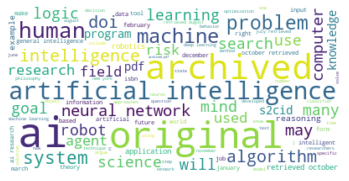

cluster: 4
Titles
Swimming


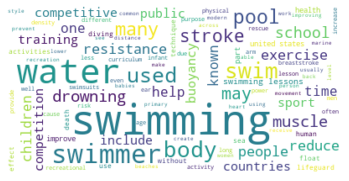

cluster: 5
Titles
Basketball


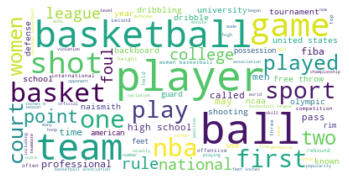

In [11]:
result={'cluster':labels,'wiki':wiki_list}
result =pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud=WordCloud(max_font_size=50,max_words=100,background_color='white').generate(text)
    print('cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cluster[wiki_cluster.cluster ==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.axis('off')
    plt.show()